In [1]:
# https://towardsdatascience.com/multi-label-text-classification-with-scikit-learn-30714b7819c5

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("Dataset .csv")
df.shape

(9551, 21)

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
df.describe(include='object')

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
count,9551,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551
unique,7446,141,8918,1208,1265,1825,12,2,2,2,1,6,6
top,Cafe Coffee Day,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average
freq,83,5473,11,122,122,936,8652,8393,7100,9517,9551,3737,3737


In [8]:
numeric_feature_columns = ["Longitude", "Latitude", "Average Cost for two", "Price range", "Votes", "Aggregate rating"]
categorical_feature_columns = ["Currency", "Has Table booking", "Has Online delivery", "Is delivering now", "Switch to order menu", "Rating color", "Rating text"]

feature_columns = numeric_feature_columns + categorical_feature_columns
feature_columns

# target_column = 'Aggregate rating'

['Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Votes',
 'Aggregate rating',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text']

In [9]:
# ''.join(df['Cuisines'])
df['Cuisines2'] = df['Cuisines'].astype(str).fillna("").apply(lambda x: [y.strip() for y in x.split(',')])

print(df.shape)
df2 = df.explode('Cuisines2')
df2.shape


(9551, 22)


(19719, 22)

In [10]:
df2[['Restaurant ID', 'Restaurant Name', 'Cuisines', 'Cuisines2']].head()

,Restaurant ID,Restaurant Name,Cuisines,Cuisines2
0,6317637,Le Petit Souffle,"French, Japanese, Desserts",French
0,6317637,Le Petit Souffle,"French, Japanese, Desserts",Japanese
0,6317637,Le Petit Souffle,"French, Japanese, Desserts",Desserts
1,6304287,Izakaya Kikufuji,Japanese,Japanese
2,6300002,Heat - Edsa Shangri-La,"Seafood, Asian, Filipino, Indian",Seafood


In [11]:
labels_df = df2[['Restaurant ID', 'Cuisines', 'Cuisines2']].drop_duplicates().set_index(['Restaurant ID', 'Cuisines2']).unstack(level=-1)
labels_df

Cuisines                                                     \
Cuisines2      Afghani African American Andhra Arabian Argentine Armenian   
Restaurant ID                                                               
53                 NaN     NaN      NaN    NaN     NaN       NaN      NaN   
55                 NaN     NaN      NaN    NaN     NaN       NaN      NaN   
60                 NaN     NaN      NaN    NaN     NaN       NaN      NaN   
64                 NaN     NaN      NaN    NaN     NaN       NaN      NaN   
65                 NaN     NaN      NaN    NaN     NaN       NaN      NaN   
...                ...     ...      ...    ...     ...       ...      ...   
18499493           NaN     NaN      NaN    NaN     NaN       NaN      NaN   
18500618           NaN     NaN      NaN    NaN     NaN       NaN      NaN   
18500628           NaN     NaN      NaN    NaN     NaN       NaN      NaN   
18500639           NaN     NaN      NaN    NaN     NaN       NaN      NaN   
18500652           NaN     NaN      NaN    NaN     NaN       NaN      NaN   

                                           ...          \
Cuisines2     Asian Asian Fusion Assamese  ... Tex-Mex   
Restaurant ID                              ...           
53              NaN          NaN      NaN  ...     NaN   
55              NaN          NaN      NaN  ...     NaN   
60              NaN          NaN      NaN  ...     NaN   
64              NaN          NaN      NaN  ...     NaN   
65              NaN          NaN      NaN  ...     NaN   
...             ...          ...      ...  ...     ...   
18499493        NaN          NaN      NaN  ...     NaN   
18500618        NaN          NaN      NaN  ...     NaN   
18500628        NaN          NaN      NaN  ...     NaN   
18500639        NaN          NaN      NaN  ...     NaN   
18500652        NaN          NaN      NaN  ...     NaN   

                                                                     \
Cuisines2                        Thai Tibetan Turkish Turkish Pizza   
Restaurant ID                                                         
53                                NaN     NaN     NaN           NaN   
55                      Chinese, Thai     NaN     NaN           NaN   
60                                NaN     NaN     NaN           NaN   
64                                NaN     NaN     NaN           NaN   
65             Chinese, Seafood, Thai     NaN     NaN           NaN   
...                               ...     ...     ...           ...   
18499493                          NaN     NaN     NaN           NaN   
18500618                          NaN     NaN     NaN           NaN   
18500628                          NaN     NaN     NaN           NaN   
18500639                          NaN     NaN     NaN           NaN   
18500652                          NaN     NaN     NaN           NaN   

                                                                
Cuisines2     Vegetarian Vietnamese Western World Cuisine  nan  
Restaurant ID                                                   
53                   NaN        NaN     NaN           NaN  NaN  
55                   NaN        NaN     NaN           NaN  NaN  
60                   NaN        NaN     NaN           NaN  NaN  
64                   NaN        NaN     NaN           NaN  NaN  
65                   NaN        NaN     NaN           NaN  NaN  
...                  ...        ...     ...           ...  ...  
18499493             NaN        NaN     NaN           NaN  NaN  
18500618             NaN        NaN     NaN           NaN  NaN  
18500628             NaN        NaN     NaN           NaN  NaN  
18500639             NaN        NaN     NaN           NaN  NaN  
18500652             NaN        NaN     NaN           NaN  NaN  

[9551 rows x 146 columns]

In [12]:
for col in labels_df.columns:
    labels_df.loc[labels_df[col].notna(), col] = 1
labels_df = labels_df.fillna(0)#[labels_df.notna()]
labels_df

Cuisines                                                     \
Cuisines2      Afghani African American Andhra Arabian Argentine Armenian   
Restaurant ID                                                               
53                   0       0        0      0       0         0        0   
55                   0       0        0      0       0         0        0   
60                   0       0        0      0       0         0        0   
64                   0       0        0      0       0         0        0   
65                   0       0        0      0       0         0        0   
...                ...     ...      ...    ...     ...       ...      ...   
18499493             0       0        0      0       0         0        0   
18500618             0       0        0      0       0         0        0   
18500628             0       0        0      0       0         0        0   
18500639             0       0        0      0       0         0        0   
18500652             0       0        0      0       0         0        0   

                                           ...                               \
Cuisines2     Asian Asian Fusion Assamese  ... Tex-Mex Thai Tibetan Turkish   
Restaurant ID                              ...                                
53                0            0        0  ...       0    0       0       0   
55                0            0        0  ...       0    1       0       0   
60                0            0        0  ...       0    0       0       0   
64                0            0        0  ...       0    0       0       0   
65                0            0        0  ...       0    1       0       0   
...             ...          ...      ...  ...     ...  ...     ...     ...   
18499493          0            0        0  ...       0    0       0       0   
18500618          0            0        0  ...       0    0       0       0   
18500628          0            0        0  ...       0    0       0       0   
18500639          0            0        0  ...       0    0       0       0   
18500652          0            0        0  ...       0    0       0       0   

                                                                             
Cuisines2     Turkish Pizza Vegetarian Vietnamese Western World Cuisine nan  
Restaurant ID                                                                
53                        0          0          0       0             0   0  
55                        0          0          0       0             0   0  
60                        0          0          0       0             0   0  
64                        0          0          0       0             0   0  
65                        0          0          0       0             0   0  
...                     ...        ...        ...     ...           ...  ..  
18499493                  0          0          0       0             0   0  
18500618                  0          0          0       0             0   0  
18500628                  0          0          0       0             0   0  
18500639                  0          0          0       0             0   0  
18500652                  0          0          0       0             0   0  

[9551 rows x 146 columns]

In [13]:
target_cols = labels_df.columns
target_cols

MultiIndex([('Cuisines',       'Afghani'),
            ('Cuisines',       'African'),
            ('Cuisines',      'American'),
            ('Cuisines',        'Andhra'),
            ('Cuisines',       'Arabian'),
            ('Cuisines',     'Argentine'),
            ('Cuisines',      'Armenian'),
            ('Cuisines',         'Asian'),
            ('Cuisines',  'Asian Fusion'),
            ('Cuisines',      'Assamese'),
            ...
            ('Cuisines',       'Tex-Mex'),
            ('Cuisines',          'Thai'),
            ('Cuisines',       'Tibetan'),
            ('Cuisines',       'Turkish'),
            ('Cuisines', 'Turkish Pizza'),
            ('Cuisines',    'Vegetarian'),
            ('Cuisines',    'Vietnamese'),
            ('Cuisines',       'Western'),
            ('Cuisines', 'World Cuisine'),
            ('Cuisines',           'nan')],
           names=[None, 'Cuisines2'], length=146)

In [14]:
labels_df.shape, df.shape

((9551, 146), (9551, 22))

In [15]:
df3 = df.merge(labels_df.reset_index(), on='Restaurant ID', how='left')
df3

C:\Users\Navya\anaconda3\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(
C:\Users\Navya\anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,"(Cuisines, Tex-Mex)","(Cuisines, Thai)","(Cuisines, Tibetan)","(Cuisines, Turkish)","(Cuisines, Turkish Pizza)","(Cuisines, Vegetarian)","(Cuisines, Vietnamese)","(Cuisines, Western)","(Cuisines, World Cuisine)","(Cuisines, nan)"
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,0,0,0,0,0,0,0,0,0,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,0,0,0,0,0,0,0,0,0,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,0,0,0,0,0,0,0,0,0,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,0,0,0,0,0,0,0,0,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,0,0,0,1,0,0,0,0,0,0
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,0,0,0,0,0,0,0,0,1,0
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,0,0,0,0,0,0,0,0,1,0
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# X = df[feature_columns]
X1 = pd.get_dummies(data=df3[feature_columns], columns=categorical_feature_columns)
scaler = MinMaxScaler()
X = scaler.fit_transform(X1)
y = np.asarray(df3[target_cols])
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7640, 37), (1911, 37), (7640, 146), (1911, 146))

In [18]:
classif = OneVsRestClassifier(SVC(kernel='linear'))
classif.fit(X_train, y_train)

C:\Users\Navya\anaconda3\lib\site-packages\sklearn\multiclass.py:80: UserWarning: Label not 45 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\Users\Navya\anaconda3\lib\site-packages\sklearn\multiclass.py:80: UserWarning: Label not 52 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\Users\Navya\anaconda3\lib\site-packages\sklearn\multiclass.py:80: UserWarning: Label not 57 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\Users\Navya\anaconda3\lib\site-packages\sklearn\multiclass.py:80: UserWarning: Label not 120 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
C:\Users\Navya\anaconda3\lib\site-packages\sklearn\multiclass.py:80: UserWarning: Label not 145 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


OneVsRestClassifier(estimator=SVC(kernel='linear'))

In [19]:
y_pred = classif.predict(X_test)
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
y_pred.shape, y_pred.sum()

((1911, 146), 281)

In [21]:
y_pred[:,145].shape

(1911,)

In [22]:
target_cols

MultiIndex([('Cuisines',       'Afghani'),
            ('Cuisines',       'African'),
            ('Cuisines',      'American'),
            ('Cuisines',        'Andhra'),
            ('Cuisines',       'Arabian'),
            ('Cuisines',     'Argentine'),
            ('Cuisines',      'Armenian'),
            ('Cuisines',         'Asian'),
            ('Cuisines',  'Asian Fusion'),
            ('Cuisines',      'Assamese'),
            ...
            ('Cuisines',       'Tex-Mex'),
            ('Cuisines',          'Thai'),
            ('Cuisines',       'Tibetan'),
            ('Cuisines',       'Turkish'),
            ('Cuisines', 'Turkish Pizza'),
            ('Cuisines',    'Vegetarian'),
            ('Cuisines',    'Vietnamese'),
            ('Cuisines',       'Western'),
            ('Cuisines', 'World Cuisine'),
            ('Cuisines',           'nan')],
           names=[None, 'Cuisines2'], length=146)

In [23]:
accuracy_df=pd.DataFrame(columns=['cuisine', 'test_accuracy'])

for i, (_, cuisine) in enumerate(target_cols):
    acc_score = accuracy_score(y_pred[:, i], y_test[:,i])
#     print('Test accuracy is {}'.format(acc_score))
    accuracy_df = pd.concat([accuracy_df, pd.DataFrame({"cuisine": [cuisine], "test_accuracy":[acc_score]})])

accuracy_df = accuracy_df.sort_values(by='test_accuracy', ascending=False)

In [24]:
accuracy_df

,cuisine,test_accuracy
0,nan,1.000000
0,Ramen,1.000000
0,B�_rek,1.000000
0,Peruvian,1.000000
0,Iranian,1.000000
...,...,...
0,Bakery,0.918891
0,Mughlai,0.897959
0,Fast Food,0.796442
0,Chinese,0.710623


<AxesSubplot:xlabel='cuisine', ylabel='test_accuracy'>

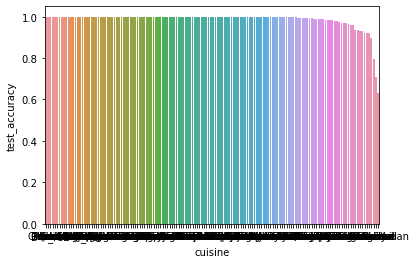

In [25]:
import seaborn as sns
sns.barplot(data=accuracy_df, x='cuisine', y='test_accuracy')
